## Introduction

Before I start the tasks assigned in the project outline, I am going to import all the libraries, load the dataset and set up a dataframe for which I will use for all the tasks.

## __Imports__

Below are the libraries and packages used for this project.

In [371]:

# I import sklearn to load the datasets.
import sklearn as skl
from sklearn import datasets
from sklearn.datasets import load_iris

# I import r2_score to calculate the r2.
from sklearn.metrics import r2_score

# I import pandas.
import pandas as pd

# I import matplotlib to create plots.
import matplotlib

# import matplotlib.pyplot to plot the data.
import matplotlib.pyplot as plt

# I import Line2D to create a custom legend.	
from matplotlib.lines import Line2D

# I import matplotlib.cm to create a colormap.
import matplotlib.cm as cm

# I import numpy to create arrays.
# See: https://numpy.org/doc/2.2/user/absolute_beginners.html
import numpy as np

#I import seaborn for data visulation.
import seaborn as sns

## Load Dataset

I download the iris data set using SKLEARN. See [Scikit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

In [372]:
# Load dataset. This command loads the iris data set and its features. 
data = skl.datasets.load_iris()

## Create a Dataframe
To create my DataFrame from the loaded dataset from SKLEARN, I use use pandas. See [pandas.pydata.org](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

In [373]:
# Create DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
target_classes = data.target

# 1. Outputs a summary of each variable to a single text file.

I am using the df.describe(): function here so that it gives me a summary for dataset. The summary shows statistics to review such as the count, mean, standard deviation, min, max, and quartiles for each feature.  See [pandas.pydata.org](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) for information on df.describe().

In [374]:
# Summerise the data set.
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


I store the results as a variable called summary so I can call back on it later when storing it as a txt file.

In [375]:
# Store the results as a variable
summary = df.describe()

To start converting this to a txt file, I use describe() to produce a table, and then using to_string() to convert it into readable string format. Then I store that string in a variable called summary_txt. See [pandas.pydata.org](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_string.html#) for information on converting a DataFrame to a string.

*Trouble shooting* - got a name error running the below code. Got this as I wasn't working with "DataFrame" anymore. I stored it as the variable "summary" in the cell above, which made the variable summary a  Dataframe. So I needed to to change it to run to_string() correctly.

Found this resource helpful to fix this: [stackoverflow.com](https://stackoverflow.com/questions/66317262/pandas-df-dataframe-is-not-defined#:~:text=That%20NameError%20you%27re%20getting%20happens%20because%20you%27re%20referring,Python%22%20on%20Google%20to%20look%20for%20more%20info.).


In [376]:
# Save the summary to a text file
# summary_txt = DataFrame.to_string()

# NameError: name 'DataFrame' is not defined

In [377]:
# Save the summary to a text file
summary_txt = summary.to_string()


Now I look at finding where I will save the file, file_path = states the path where I want to save the summary file. I have set it so that the file will be saved in the current working directory with the name iris_summary.txt. I used this resource for support on this [www.delftstack.com](https://www.delftstack.com/howto/python/set-file-path-python/).

In [378]:
# Define the path where the file will be saved
file_path = 'iris_summary.txt'

I use the with open() function to open the file and also to make sure the file automatically closes once finished. This is considered a safer way to prevent file corruption  

This opens a file for writing. If the file doesn't exist, it will be created. If it does exist, the content will be overwritten ('w' stands for write mode).

I used this resource for help on file handling [www.geeksforgeeks.org](https://www.geeksforgeeks.org/file-handling-python/).

In [379]:
# Write the summary to the text file
with open(file_path, 'w') as f:
    f.write(summary_txt)


The print function along with the f string will print a message to the terminal, confirming that the summary has been successfully saved to the file. See section 2.4.3. f-strings on  [docs.python.org](https://docs.python.org/3/reference/lexical_analysis.html#f-strings).

In [380]:
print(f"Summary saved to {file_path}")


Summary saved to iris_summary.txt


# 2. Saves a histogram of each variable to png file

To create a histogram, I refer to [Matplotlib Documentation](https://matplotlib.org/stable/plot_types/stats/hist_plot.html#sphx-glr-plot-types-stats-hist-plot-py) I am using the module pyplot to create plots and figures. 

I use the plt.hist() function (See [matplotlib.org](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to create a histogram for the features. 

I change the  colours of each histogram to distinguish them from each other. I use the matplot lib colour maps reference [Matplotlib](https://matplotlib.org/stable/users/explain/colors/colors.html).

I was getting a Key Error:  'sepal lengh (cm)' cell execution error for this line: when I didn't match it to the column names exactly. I used ChatGBT to help me figure this error out - [chatgpt.com](https://chatgpt.com/share/680e8aeb-0284-8012-94af-cb39c6dba68d)

In [381]:
# Check how the names of the features appear in the dataset.
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


To plot this histograms, I refer to the [Matplotlib Histogram Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) for guidance as well as looking at a resource on [Geeksforgeeks.org](https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/). To start, I look at using subplots to create grids [See pyplot.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html). I set it to 2x2 and I set the figsize to 10 x 8 as I believe that will give me a good size to view the data. 

To set the title, I use the function set_title and name the histograms what feature name it will be generating [See set_title](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html). I set the label for the x-axis to show which feature name I am looking at [See set_x_label](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html). Then I set the label for the y-axis to measure the frequency of the feature [See set_y_label](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html).

I also set different colours of each of the histogram to distinguish them from each other. 

I use the Matplotlib function tight.layout() [See Pyplot tight_layout Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html) to adjust the spacing between the plots and make sure there is no overlap of the titles, axis, data etc. It makes the histogram tidier. 

I use [Pyplot Save Fig](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html) to save the histogram to  png. Then to render the histogram in the Jupyter Notebook, I use plt.show() [See Pyplot Show](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html). I had to use the save fig function before the plt.show function as it wouldn't load correctly. If I did it the other way around, it was saving a blank png.

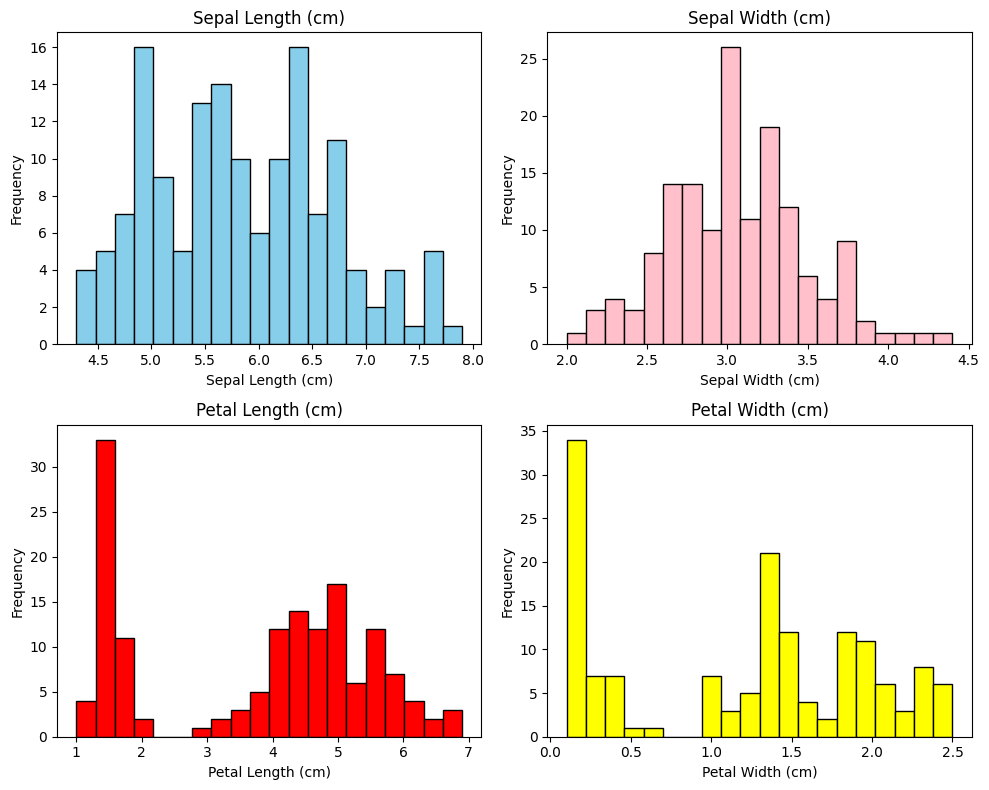

In [382]:
# Plot histograms for each feature.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

fig, axes = plt.subplots(2, 2, figsize=(10, 8))  

# Plot each feature's histogram.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

axes[0, 0].hist(df['sepal length (cm)'], bins=20, color='skyblue', edgecolor='black')

# Set the title.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html

axes[0, 0].set_title('Sepal Length (cm)')

# Set the x-axis. This is set to show the feature data.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html

axes[0, 0].set_xlabel('Sepal Length (cm)')

# Set the y-axis. his is set to show the the frequency of the feature's measurements.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html

axes[0, 0].set_ylabel('Frequency')

# Repeat the above steps for the remaining 3 features, changing colours of each histogram to distinguish them from each other.

axes[0, 1].hist(df['sepal width (cm)'], bins=20, color='pink', edgecolor='black')
axes[0, 1].set_title('Sepal Width (cm)')
axes[0, 1].set_xlabel('Sepal Width (cm)')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(df['petal length (cm)'], bins=20, color='red', edgecolor='black')
axes[1, 0].set_title('Petal Length (cm)')
axes[1, 0].set_xlabel('Petal Length (cm)')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(df['petal width (cm)'], bins=20, color='yellow', edgecolor='black')
axes[1, 1].set_title('Petal Width (cm)')
axes[1, 1].set_xlabel('Petal Width (cm)')
axes[1, 1].set_ylabel('Frequency')


# Adjust layout to prevent overlap
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html

plt.tight_layout()


# Save the histogram as a png.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
plt.savefig('Histogram_All_Features.png')

# Show the plots.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html

plt.show()

## Why use Histograms?

A histogram is useful because it helps me to visualise the data. By using it I can see the distribution of each of the features in the dataset. So for example, the histograms will who me how the the values are spread, if they are uniform or maybe if they are skewed. This will help me understand the nature of each variable.

## Analysis from Histogram

I referred to [www.statology.org](https://www.statology.org/describe-shape-of-histogram/) for information on Histogram shapes.

- _Sepal Lengh:_ The sepal lenght appears to be multi-modal, in that it has multiple peaks. I can see that there looks to be a very wide spread between 4.3 cm to 8.0 cm, but in saying that, there are values that cluster in around 5.0–6.5 cm.

- _Sepal Width:_  The sepal Width is slightly right skewed in that there are more values clustering on the left side and theres a longer tail on the right. I can see a peak at around 3cm, making it the most common sepal width. There are appears to be less instances that occur at the ends of the spread, around 2.0 cm and after 4.0 cm, which would suggest there is  less variability than the sepal length.

- _Petal Lenght:_ The petal lenght is a clear bimodal and has two distinctive peaks, pme at 1.5 cm and the other between 4cm-5.5 cm. I can see that there is a low frequency between the peaks between 2-3cm. The distinct drop in how many flowers have petal lengths in that range suggests there might not be an overlap in the species for that range. 

- _Petal Width:_ The petal width is also a bimodal that has a distinctive peak at around 0.2 cm and another between 1.2 and 2cm. Like the petal lenght, there is a drop off in frequency after 2.5cm and also in the range of 0.5cm and 1cm. This would suggest that some of the flowers have really thin petals while others have wider ones.


__Sepal Lenght vs Sepal Width:__ Lenght is bigger than width here, Lenght has more varibility than the width.

__Petal Lenght vs Petal Width:__ The Width is smaller than the petal length but it still shows variability.


## Limitations of Histograms?

There can be limitations to the use of histograms. 

For example they are useful to analyis one feature at a time. However If I was to overlap the features or stack them over each other to try show relationships between, for example the sepal width and lenght,  it can become clustered or difficult to interpret. They can look messy. For example, see [www.tutorialspoint.com](https://www.tutorialspoint.com/exploratory-data-analysis-on-iris-dataset#:~:text=show()-,Example%2010,-%23%23%20From%20the%20above) for a histogram that may be difficult to interpret if you were not familar with how to read histograms. There is a lot going on it. 

In conclusion, I think Histograms are excellent to use for individual features but not for multivariate analysis.



## Additional PNG files of the Histogram features.

I have outputted the features from the histogram seperately below, as they may be benficial for anyone with visual impairments. By blowing up the fig size, I increased the size of the graph. I increased the font size also for easier to read. 

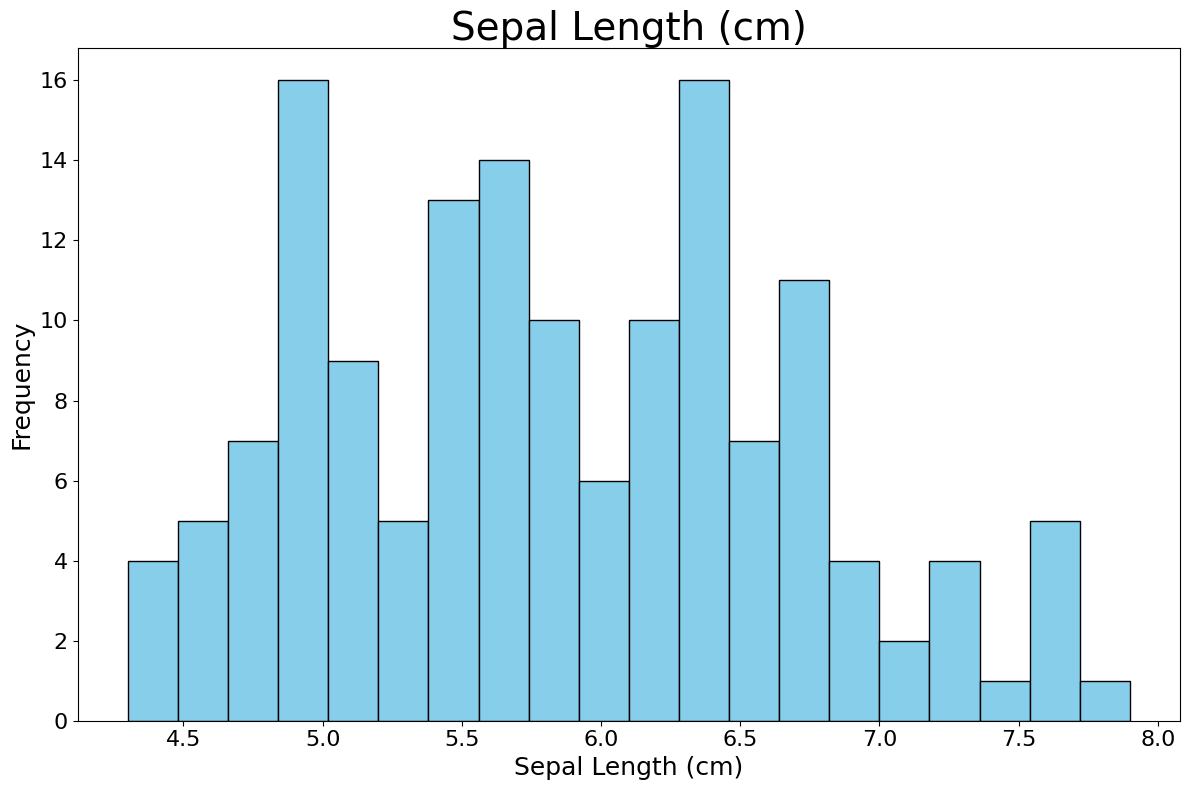

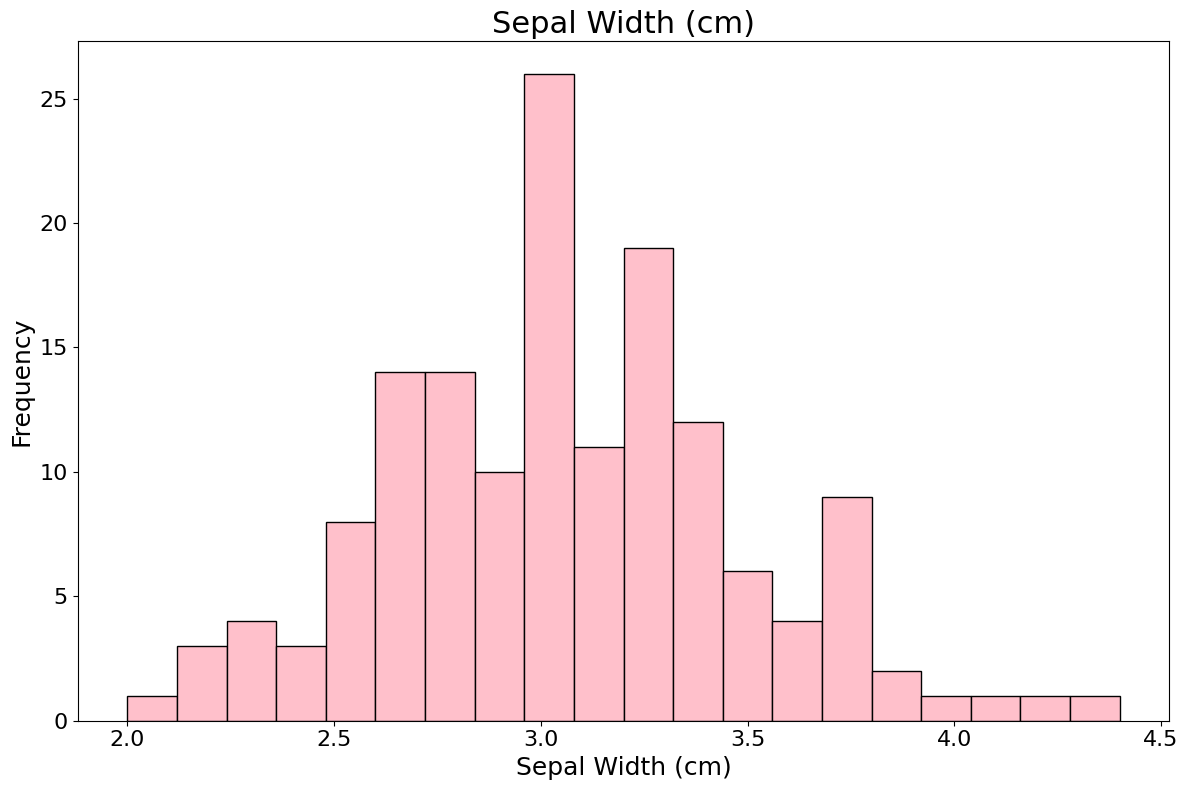

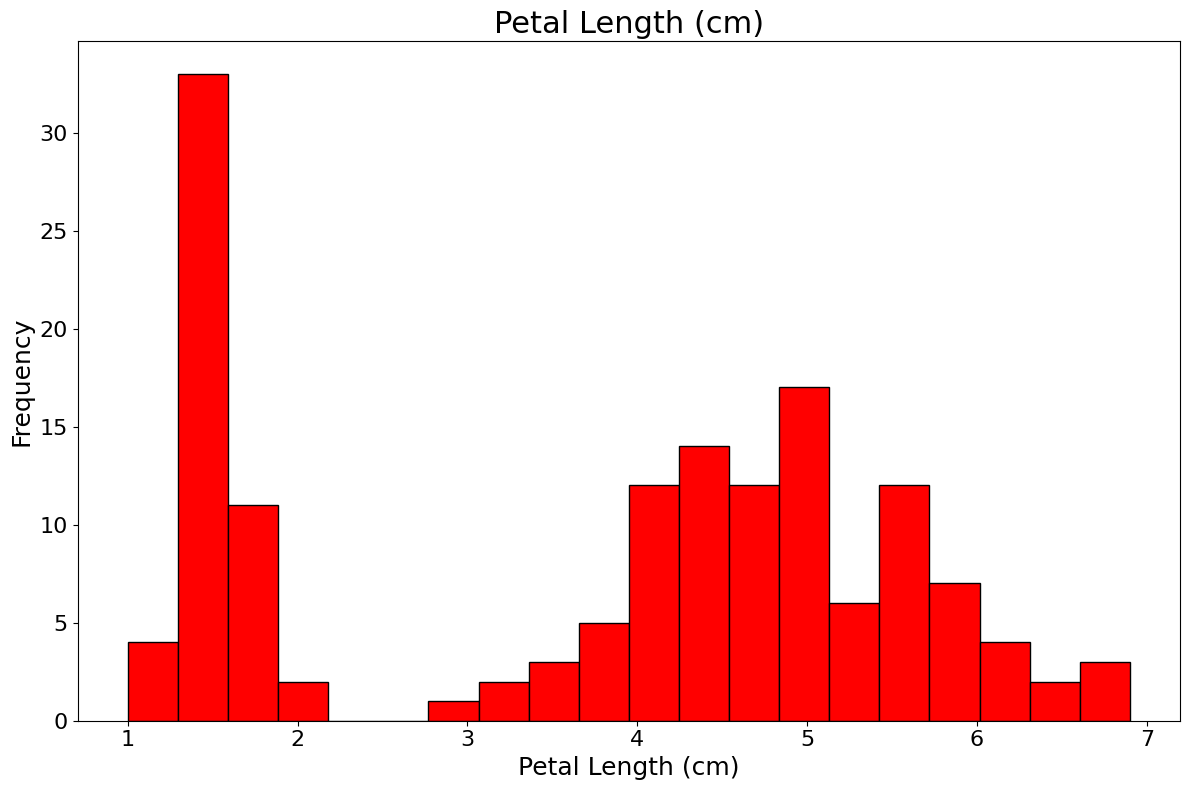

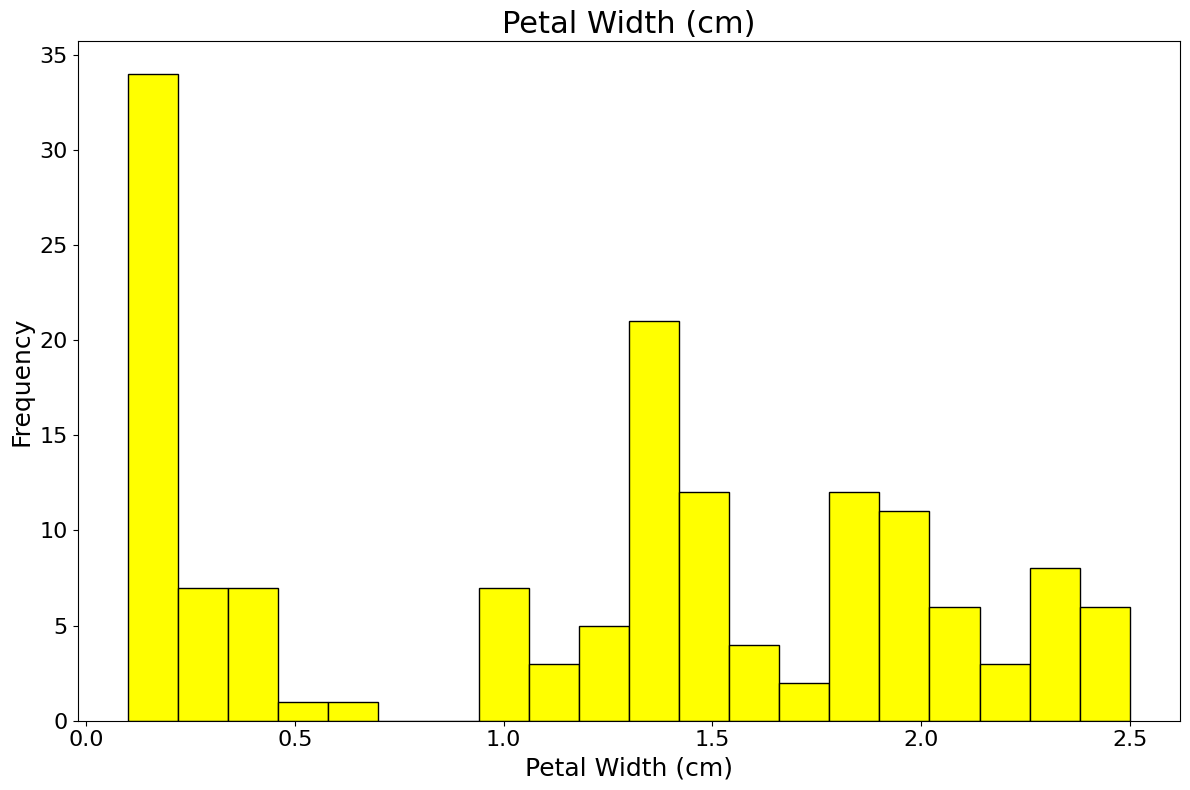

In [383]:
# I create a histogram for each of the features in the iris dataset but this time I save them as separate images. 
# I wont use subplots for this but instead create separate figures using the plt.figure() function.

# Histogram for Sepal Length.

# Create the figure.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
plt.figure(figsize=(12, 8))

# Create the histogram.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
plt.hist(df['sepal length (cm)'], bins=20, color='skyblue', edgecolor='black')

# Set the title.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html
plt.title('Sepal Length (cm)', fontsize=28)

# Set the x-axis label.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html
plt.xlabel('Sepal Length (cm)', fontsize=18)

# Set the y-axis label.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html
plt.ylabel('Frequency', fontsize=18)

# Set the font size for the ticks on the x and y axes.
# This is to make the font size bigger.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xticks(fontsize=16)
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html
plt.yticks(fontsize=16)

# prevent overlap.
plt.tight_layout()
# Save the histogram as a png.
plt.savefig('hist_sepal_length.png')

plt.show()

# Repeat the above steps for the remaining 3 features, I change colours of each histogram to distinguish them.

# Sepal Width
plt.figure(figsize=(12, 8))
plt.hist(df['sepal width (cm)'], bins=20, color='pink', edgecolor='black')
plt.title('Sepal Width (cm)', fontsize=22)
plt.xlabel('Sepal Width (cm)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('hist_sepal_width.png')
plt.show()

# Petal Length
plt.figure(figsize=(12, 8))
plt.hist(df['petal length (cm)'], bins=20, color='red', edgecolor='black')
plt.title('Petal Length (cm)', fontsize=22)
plt.xlabel('Petal Length (cm)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('hist_petal_length.png')
plt.show()

# Petal Width
plt.figure(figsize=(12, 8))
plt.hist(df['petal width (cm)'], bins=20, color='yellow', edgecolor='black')
plt.title('Petal Width (cm)', fontsize=22)
plt.xlabel('Petal Width (cm)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('hist_petal_width.png')
plt.show()


# 3. Outputs a scatter plot of each pair of variables. 

To create the scatter plot, I start by loading the target classes and storing them as a variable to call on in the scatterplot. I set the fig size first before plotting the scatterplot. I refer to the [Matplotlib Scatterplot Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) but I also found [W3Schools Matplotlib Scatter](https://www.w3schools.com/python/matplotlib_scatter.asp) a useful resource, particularly for the colour map and colour schemes. [Matplotlib Colour Maps](https://matplotlib.org/stable/users/explain/colors/colormaps.html) was an additional resource I used for the colour maps. I selected viridis as it is a known colour blind friendly colour map.

I c=target in plt.scatter() to color-code the points according to the target labels. Cmap gives us the colour scheme, I chose Viridis. It is a known colour map scheme that is colour blind friendly. Edgecolour is the colour surrounding the bins, k is black. The s parameter in plt.scatter() allows me to adjust the size of the markers used to represent the data points. 

Then I set my title, x-axis and y-axis like I have done in the above task. I chose the two features; sepel length and petal lenght and  label the x-axis and y-axis to reflect this. [See set_title](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html), [set_x_label](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html) and [set_y_label](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html).

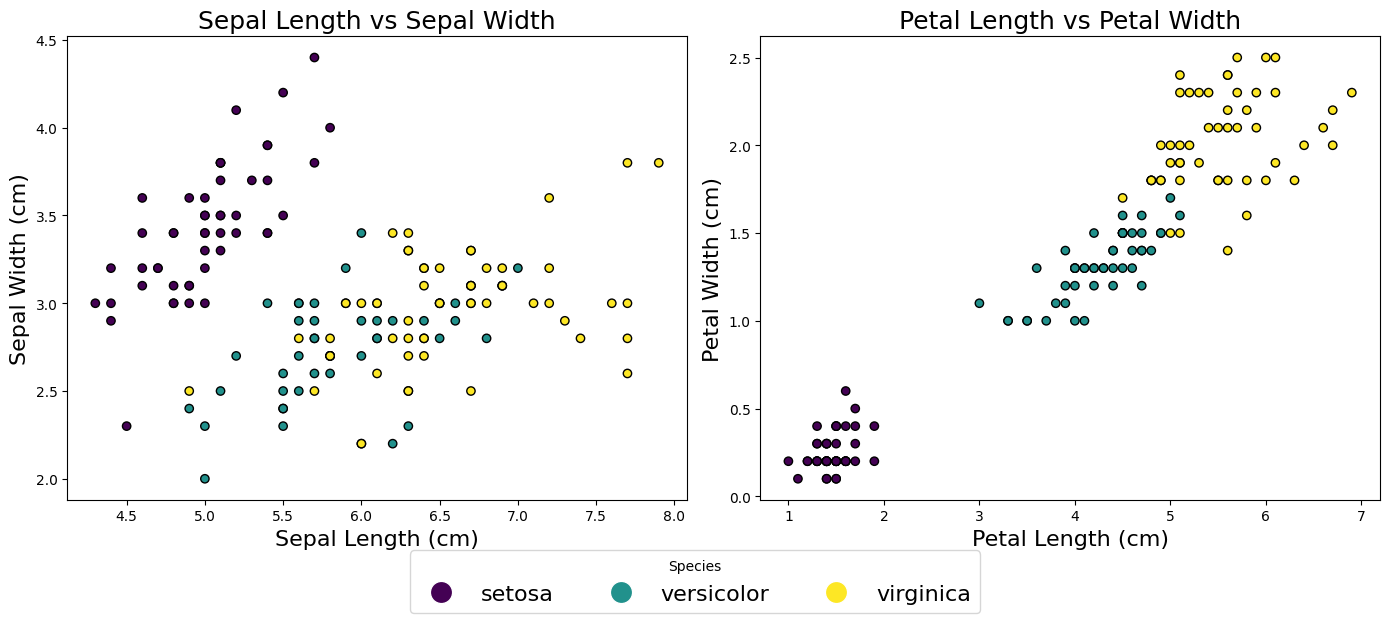

In [384]:
# Use plt.get_cmap to create a colormap.
# See: https://matplotlib.org/stable/tutorials/colors/colormaps.html
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.get_cmap.html
# This will create a colormap with 3 colours to match the 3 species in the dataset.
colourmap = plt.get_cmap('viridis', 3)

# Create the figure with 1 row x 2 columns.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# For the 1st Plot, Sepal Length vs Sepal Width.

# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html
axes[0].scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=target_classes, cmap=colourmap, edgecolor='black')

# Set the x-axis label.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html
axes[0].set_xlabel('Sepal Length (cm)', fontsize=16)

# Set the y-axis label.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html
axes[0].set_ylabel('Sepal Width (cm)', fontsize=16)

# Set the title.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html
axes[0].set_title('Sepal Length vs Sepal Width', fontsize=18)

# The 2nd plot, Petal Length vs Petal Width.

# Repeat the above steps for the 2nd plot.
axes[1].scatter(df['petal length (cm)'], df['petal width (cm)'], c=target_classes, cmap=colourmap, edgecolor='black')
axes[1].set_xlabel('Petal Length (cm)', fontsize=16)
axes[1].set_ylabel('Petal Width (cm)', fontsize=16)
axes[1].set_title('Petal Length vs Petal Width', fontsize=18)
 
# Custom legend using Line2D.
# Colourmap will set the colours of the data in the legend. 
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_markeredgecolor

legend_elements = [ Line2D([0], [0], marker='o', color='w',label='setosa', markerfacecolor=colourmap(0 / 2), markersize=16),
    Line2D([0], [0], marker='o', color='w',label='versicolor', markerfacecolor=colourmap(1 / 2), markersize=16),
    Line2D([0], [0], marker='o', color='w', label='virginica', markerfacecolor=colourmap(2 / 2), markersize=16)]

# Add the legend below the plots.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.legend.html
fig.legend(handles=legend_elements, title="Species", loc='lower center',bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize=16)

# prevent overlap.
plt.tight_layout(rect=[0, 0.05, 1, 1])

# Save the scatterplot as a png.
plt.savefig('iris_scatterplot.png', bbox_inches='tight')
plt.show()


## Why use Scatterplots 


Scatter plots are great to help me visualise relationships between variables. It can help identify patterns or trends. They are really good tool to detect clusters, groupings or even outliers. By using colour coding as well, they make it easy to compare variables. 

## Limitations to Scatterplots

A limitation is that it can only show two variables, if I add more you risk the plot being unreadable and cluttered. If I were to use a bigger data set, with many data points, there could be risk of the points overlapping which would make it harder to pinpoint the data values or trends between the variables hard to understand. 

See [corporatefinanceinstitute.com](https://corporatefinanceinstitute.com/resources/data-science/scatter-plot/) for reference.


## Scatterplot Analyis

_Sepal Length vs Sepal Width_

Looking at the species Setosa, the purple colour on the scatter plot, I can see a cluster with short seoal lenghts at around 4.45 cm-5.5cm and with the larger sepal widths at around 3cm-4.5cm. This give a clear distingusion for this specials compared to the other two the  based on on the sepel measurements. Looking now at Veriscolour, the teal colour, and Virginia, the yellow colour, I can see some overlapping occuring. Virginica looks to have just slightly longer sepals, but this wouldn't be enough to be able to distinguish them apart the way Setosa does.

_Petal Length vs Petal Width_

At a first glance, I can see a clearer distinction between the features. Setosa is showing a tight cluster at the bottom left, indicating it has both short and narrow petals. There is a bit of overlap here with Versicolour and Virginia, but Veriscolour appears to have medium sized petals. It lies between Setosa and Virginica. Virginica shows it has longer and wider petals as it is mostly seperated at the top right corner of the scatterplot. 


# Performs any other analysis you think is appropriate. 

## __Linear Regression__

_"In statistics, linear regression is a model that estimates the relationship between a scalar response (dependent variable) and one or more explanatory variables (regressor or independent variable)."_

[en.wikipedia.org](https://en.wikipedia.org/wiki/Linear_regression)

I was struggling to understand some resources on Linear Regression as they were very heavy in mathmathical language, so I referred to a [Datacamp.com Tutorial](https://www.datacamp.com/tutorial/simple-linear-regression), used [ChatGBT](https://chatgpt.com/share/68121392-b24c-8012-9970-1d746b84fbb6) as a starting point for me to apply this to scatterplots. I also went back over lecture notes as well. NOTE __Check over chat gbt link that it works__ 

## __Linear Regression Formula__

$y=mx+b$ 

or 

$y=m*x+b$ ( y equals m multiplied by x plus b)

Broken down this means:

- y is the dependent variable (what it's predicting),

- x is the independent variable (input),

- m is the slope (how much y changes with x),

- b is the intercept (value of y when x = 0).


I am going to convert this in the code by using:


y_predicted = slope * x + intercept


I used [ChatGBT](https://chatgpt.com/share/6814a84b-04f8-8012-934a-c13033bc4829) for help converting the formula to this code. 

Which will mean that:

x is the input value the sepal length,

y_predicted is the predicted output value, the petal length.

I am using this Linear Regression Line on the scatter plot to see when I am given a certain sepal length, what petal length should I expect to see.

To do this , I replicate my scatter plot from above and add the linear regression line. I found [geeksforgeeks.org](https://www.geeksforgeeks.org/numpys-polyfit-function-a-comprehensive-guide/#1-linear-fit) and [data36.com](https://data36.com/linear-regression-in-python-numpy-polyfit/) helpful on understanding how to use polyfit for linear regression lines. 


## Adding a Regression line for the scatterplot to investigate correlation between the features. 

Strength of Relationship :

If the points lie close to the regression line, it suggests a strong linear relationship between the two features.

A wider scatter indicates a weaker relationship.

Direction of Relationship:

An upward-sloping line indicates a positive correlation: as one feature increases, the other tends to increase.

A downward-sloping line indicates a negative correlation.

Predictive Potential:

If the relationship is strong and linear, it implies that one feature could be used to predict the other (e.g. petal length predicting petal width).

https://www.technologynetworks.com/informatics/articles/linear-regression-396146#D1

https://www.w3schools.com/python/python_ml_linear_regression.asp

## Coefficeint of Determination 

_"The coefficient of determination is a number between 0 and 1 that measures how well a statistical model predicts an outcome."_ [www.scribbr.com](https://www.scribbr.com/statistics/coefficient-of-determination/)

Coefficient of determination or rather R Squarred Value range meaning is as follows:

- 0	The model does not predict the outcome.
- Between 0 and 1	The model partially predicts the outcome.
- 1	The model perfectly predicts the outcome.



I replicate the scatterplot with the linear regression line to look for the coefficeint of determination. I use R2_Score to calculate this for me. See [scikit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) and [www.geeksforgeeks.org](https://www.geeksforgeeks.org/how-to-calculate-r2-with-scikit-learn/)


X = iris.data will store the extracted Features (sepal_length, sepal_width, petal_length, petal_width)

Y = iris.target will store the extracted labels( species)

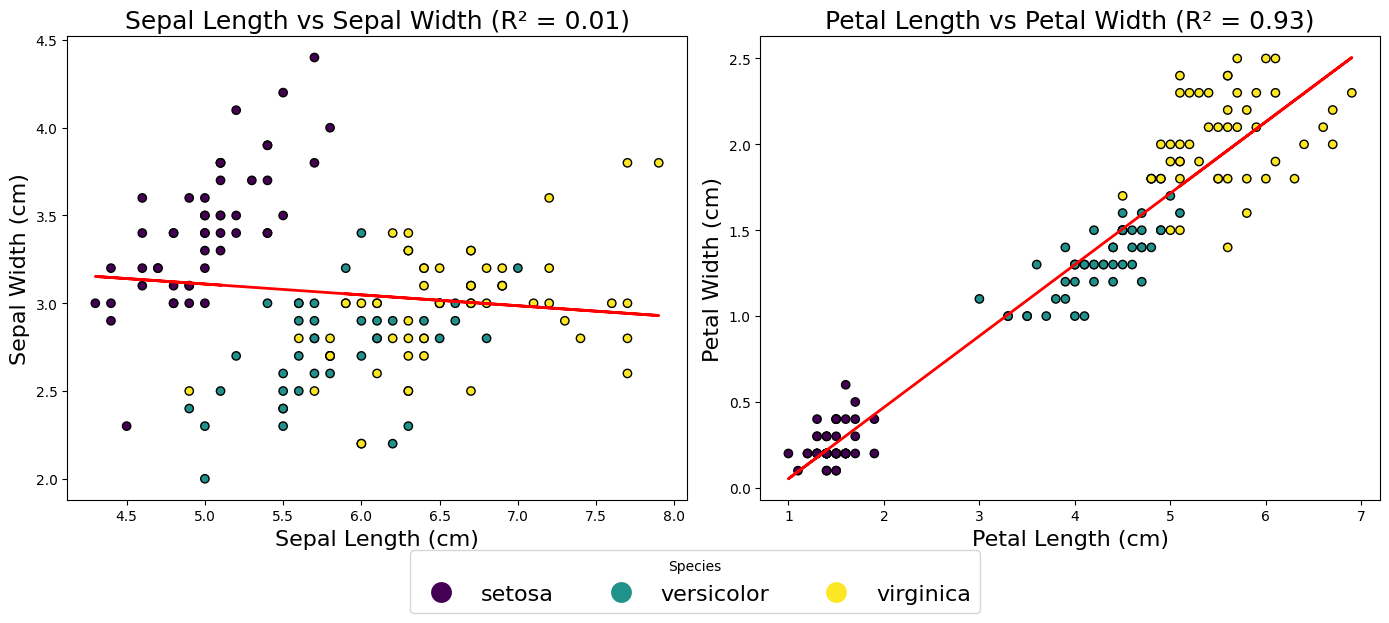

In [386]:
# Replicate the scatter plot with linear regression and R² value.
# Create a colormap with 3 colours for the 3 species
colourmap = plt.get_cmap('viridis', 3)

# Create the figure with 1 row x 2 columns. Seting a big figure size.
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Store sepal lenght as a varriable called x.
X = df['sepal length (cm)']

# Store sepal width as a varriable called y.
Y = df['sepal width (cm)']

# 1st scatter plot for Sepal Length vs Sepal Width.
axes[0].scatter(X, Y, c=target_classes, cmap=colourmap, edgecolor='black')

# Fit a regression line for Sepal Length vs Sepal Width using numpy.polyfit.
# See: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
slope, intercept = np.polyfit(X, Y, 1)

# Calculate the slope, m, and intercept ,b, for the line using numpy polyfit.
# np.polyfit will fit a straight line of 1 degree to x and y.
# Slope is how steep the line will be.
# Intercept is where the line will cross y.
Y_pred = slope * X + intercept

# Calculate R² using sklearn. 
# This will show how the regression line fits the data.
# See: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
r2 = r2_score(Y, Y_pred)

# Plot regression line.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html
axes[0].plot(X, Y_pred, color='red', lw=2)

# Axis labels and title with R².
axes[0].set_xlabel('Sepal Length (cm)', fontsize=16)
axes[0].set_ylabel('Sepal Width (cm)', fontsize=16)

# Set the title with R² value.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html
# See: https://matplotlib.org/stable/tutorials/text/text_intro.html
axes[0].set_title(f'Sepal Length vs Sepal Width (R² = {r2:.2f})', fontsize=18)

# Repeat the above steps for the 2nd plot, Petal Length vs Petal Width.

# Store petal lenght as a varriable called x.
X = df['petal length (cm)']
# Store petal width as a varriable called y.
Y = df['petal width (cm)']

# Create scatter plot
axes[1].scatter(X, Y, c=target_classes, cmap=colourmap, edgecolor='black')

# # Fit a regression line for Petal Length vs Petal Width using numpy.polyfit.
slope, intercept = np.polyfit(X, Y, 1)

# Calculate the slope, m, and intercept, b, for the line using numpy polyfit.
Y_pred = slope * X + intercept

# Calculate R² using sklearn.
r2 = r2_score(Y, Y_pred)

# Plot regression line.
axes[1].plot(X, Y_pred, color='red', lw=2)

# Axis labels and title with R²
axes[1].set_xlabel('Petal Length (cm)', fontsize=16)
axes[1].set_ylabel('Petal Width (cm)', fontsize=16)

# Set the title with R² using f-string to format the it to 2 decimal places. 
# See: https://docs.python.org/3/library/string.html#format-specification-mini-language:~:text=Format%20examples%C2%B6,%27%7B%3A03.2f%7D%27.
axes[1].set_title(f'Petal Length vs Petal Width (R² = {r2:.2f})', fontsize=18)

# Set the Legend.
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='setosa', markerfacecolor=colourmap(0 / 2), markersize=16),
    Line2D([0], [0], marker='o', color='w', label='versicolor', markerfacecolor=colourmap(1 / 2), markersize=16),
    Line2D([0], [0], marker='o', color='w', label='virginica', markerfacecolor=colourmap(2 / 2), markersize=16)
]

# Add the legend below the plots.
fig.legend(handles=legend_elements, title="Species", loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize=16)

# Adjust layout and prevent overlap
plt.tight_layout(rect=[0, 0.05, 1, 1])

# Save the figure as a png.
plt.savefig('iris_scatterplot_with_linear_regression_and_R2.png')

plt.show()


## Box Plot

I refer to [Geeksforgeeks.org](https://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/) for information on Boxplots as well as refer to the [Offical Seaborn Documentation](https://seaborn.pydata.org/generated/seaborn.load_dataset.html). I am using seaborn as i think it make it look nicer.

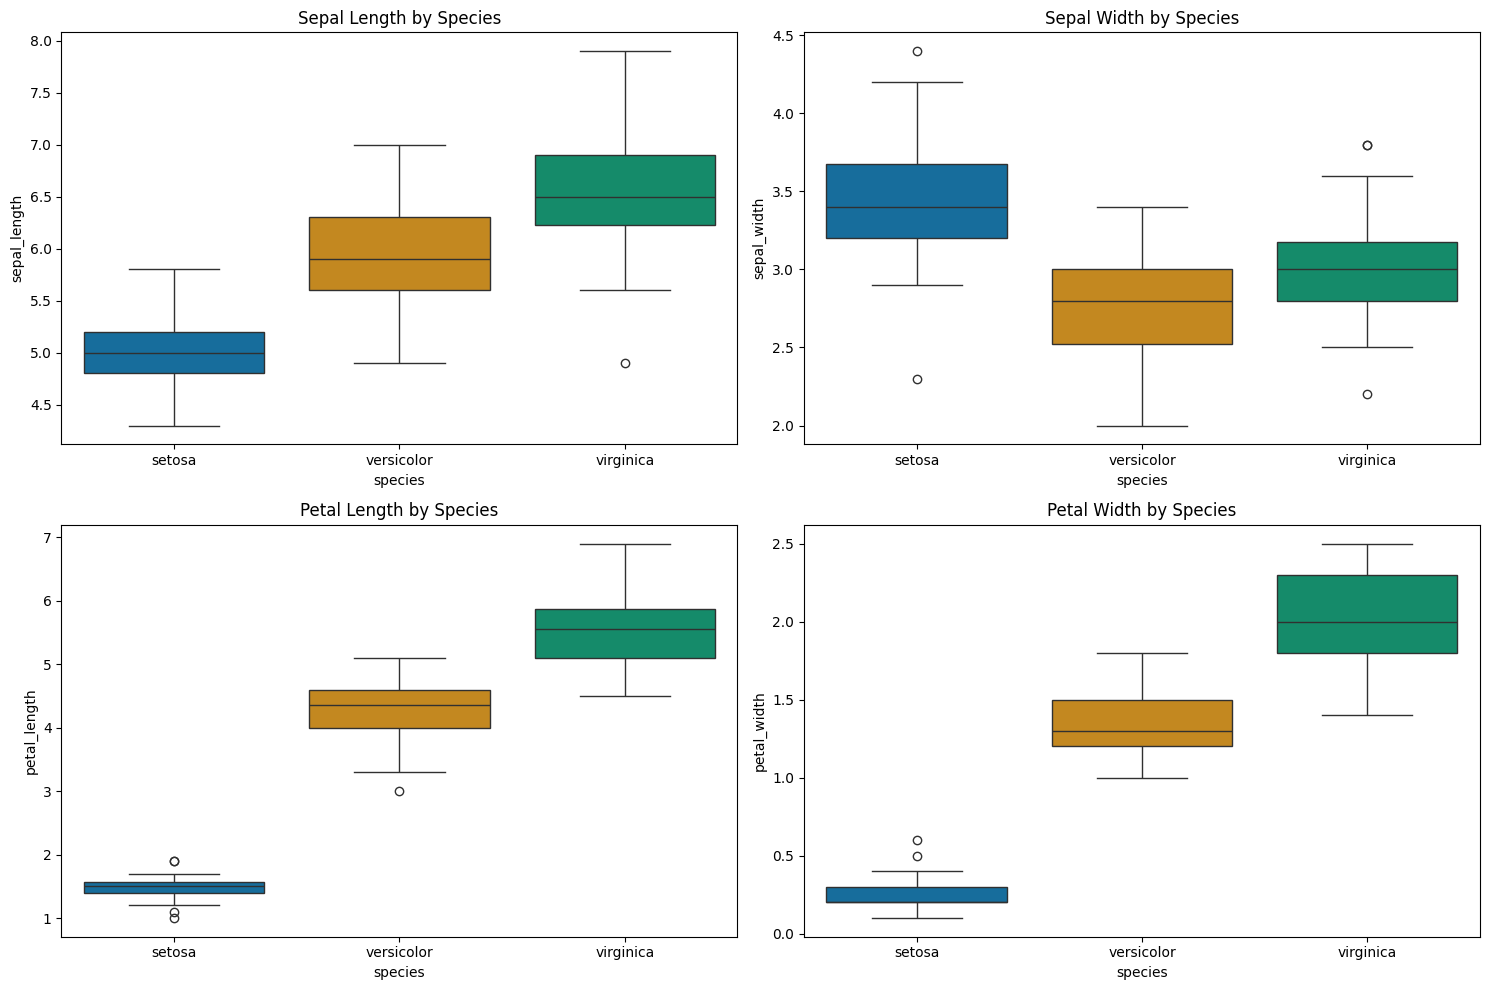

In [387]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset.
# See: https://seaborn.pydata.org/generated/seaborn.load_dataset.html.
# This will load the iris dataset from seaborn's built-in datasets.
iris = sns.load_dataset("iris")

# Define the features to plot.
# See: https://seaborn.pydata.org/tutorial/axis_grids.html

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Create the figure.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
# I am setting the figure size to 15x10 inches.
# I believe this will be a good size for showing the four subplots.

plt.figure(figsize=(15, 10))

# Manually create subplots for each feature.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
# I am using a 2x2 grid of subplots.
# I am going to use seaborn's boxplot function to create the boxplots as I like the colours in them.
# See: https://seaborn.pydata.org/tutorial/axis_grids.html
# See: https://seaborn.pydata.org/tutorial/boxplot.html

# Each subplot will generate a boxplot of the feature against the species.

# The first subplot generates the sepal length for each species.

# I am using the Colourblind palette to make it more accessible.
# See: https://seaborn.pydata.org/tutorial/color_palettes.html

plt.subplot(2, 2, 1)
sns.boxplot(data=iris, x='species', y=features[0], hue="species", palette="colorblind")
plt.title(f'{features[0].replace("_", " ").title()} by Species')

# The second subplot generates the sepal width for each species.

plt.subplot(2, 2, 2)
sns.boxplot(data=iris, x='species', y=features[1],hue="species", palette="colorblind")

plt.title(f'{features[1].replace("_", " ").title()} by Species')

# The third subplot generates the petal length for each species.

plt.subplot(2, 2, 3)
sns.boxplot(data=iris, x='species', y=features[2], hue="species", palette="colorblind")
plt.title(f'{features[2].replace("_", " ").title()} by Species')

# The fourth subplot generates the petal width for each species.

plt.subplot(2, 2, 4)
sns.boxplot(data=iris, x='species', y=features[3], hue="species", palette="colorblind")	
plt.title(f'{features[3].replace("_", " ").title()} by Species')

# Adjust the layout to prevent overlap.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html
# This will make sure the subplots are nice and tidy and not going to interfere with each other.

plt.tight_layout()

# Show the boxplots.

plt.show()


 ## Why choose a box plot for analaysis ? 


I can see the distribution for each of the features and for each of the Flower Species

Each box plot shows the median, quartiles, and potential outliers for each flower and feature.

Median is the middle line of the box, this will give the central tendency.

Box is the interquartile range and it will show the spread of the middle 50% of data.

Whiskers will suggest  the spread of the data (excluding outliers).

Dots will highlight outliers. As we can see, the iris setosa has a much smaller petal lenght than the other two and it shows up as a dot outside the whiskers.


https://wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots

https://stackoverflow.com/questions/66395848/boxplot-what-do-the-dots-represent

## Analysis 


Setosa is usually distinct: especially in petal length and petal width, where it forms a non-overlapping distribution with the others. As I can see, the iris setosa has a much smaller petal lenght than the other two and it shows up as a dot outside the whiskers.

Versicolor and Virginica often overlap, but Virginica tends to have larger values for most features.


Petal length and petal width are highly discriminative Setosa is completely separate.

Sepal width has more overlap, especially between species — it’s likely a weaker predictor.


From the above graph, we can see that – 

Species Setosa has the smallest features and less distributed with some outliers.
Species Versicolor has the average features.
Species Virginica has the highest features

## Heatmap

## Correlation Coefficients

_"The Pearson correlation coefficient (r) is the most common way of measuring a linear correlation. It is a number between –1 and 1 that measures the strength and direction of the relationship between two variables."_ [www.scribbr.com](https://www.scribbr.com/statistics/pearson-correlation-coefficient/)


Correlation Value range meaning is as follows:

- +1.0	Perfect positive correlation (they increase together)
- 0	No correlation (no clear relationship)
- -1.0	Perfect negative correlation (one increases, the other decreases)


Looking at the heatmap I can see that the Petal length is highly correlated with petal width and sepal length; sepal length is negatively correlated with the other three features.

[www.atlassian.com](https://www.atlassian.com/data/charts/heatmap-complete-guide#:~:text=Petal%20length%20is%20highly%20correlated%20with%20petal%20width%20and%20sepal%20length%3B%20sepal%20length%20is%20negatively%20correlated%20with%20the%20other%20three%20variables.)

Plamsa is a good colour blind option high contrast colours, staying away from green and red (most common colour blindness) and using blue, purple and yellow.

Go into further detail on CORR - maybe add numbers on the grids? Is that possible, need to research

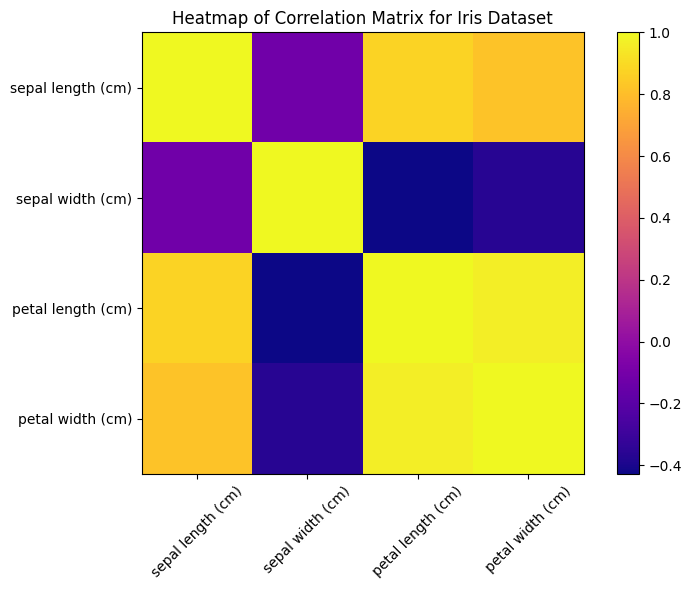

In [388]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the iris dataset.
# See: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
iris = load_iris()

#convert the data into a Pandas Dataframe
# adds columns based off the feature names from the data

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Using the corr() function to calculate correlations between columns in the DF. 
# See: https://www.geeksforgeeks.org/python-pandas-dataframe-corr/

corr_matrix = df.corr()

# Set the figure size.
plt.figure(figsize=(8, 6))  

# Create the heatmap using the imshow() function.
# See: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
# Using the cmap 'PiYG' to choose pink and green colours for the heatmap.
# See: https://matplotlib.org/stable/tutorials/colors/colormaps.html
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

plt.imshow(corr_matrix, cmap='plasma', interpolation='none')  

# Add a color bar.

plt.colorbar()  

# Set the x axis ticks.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html

plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)

# Set the y-axis ticks.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html

plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)

# Set a title and show.

plt.title('Heatmap of Correlation Matrix for Iris Dataset')

# Adjust layout for better spacing.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html

plt.tight_layout()  

# Show the heatmap.

plt.show()


## Analysis from HeatMap

From the above graph, we can see that –

Petal width and petal length have high correlations. 
Petal Width and Sepal length have good correlations.

Include what doesnthave good correlations

This green pink not good for colour blind redo 

I am using Seaborns paramater colour blind to set the palatte as  colorblind-friendly, see [Seaborn Documentation Colour Palattes](https://seaborn.pydata.org/tutorial/color_palettes.html#:~:text=Seaborn%20in%20fact%20has%20six%20variations%20of%20matplotlib%E2%80%99s%20palette%2C%20called%20deep%2C%20muted%2C%20pastel%2C%20bright%2C%20dark%2C%20and%20colorblind.).

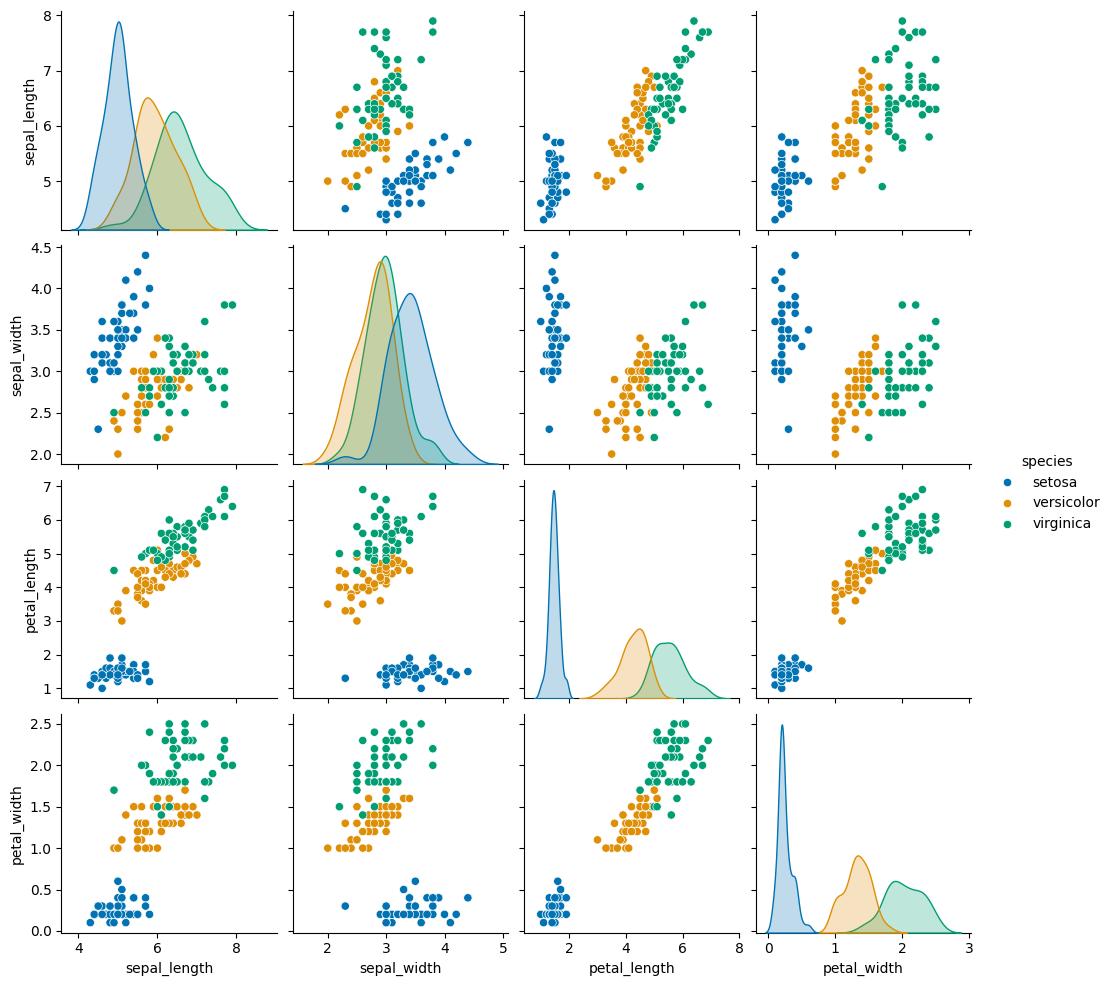

In [389]:
# I am going to load the iris dataset for seaborn.
# See: https://seaborn.pydata.org/generated/seaborn.load_dataset.html
df = sns.load_dataset("iris")

# Create the pair plot. 
# I set the colour palette as one that is colorblind-friendly.
sns.pairplot(df, hue="species", palette="colorblind")

plt.show()



## Analysis from Pair Plot




## Violin Plot

__Why use it ?__

It does a great job of showing the distribution shape. Compared to the box plot, a violin plot shows the full probability density. I can see if values are skewed, clustered.

It gives me clearer insight into the variability of the categories. I can check how spread out some of the values are.

It includes a box plot inside that shows the median and quartiles. It then adds a Kernel Density Estimate around it.

So it makes it useful for comparing features. 


__Limitations__

Can be hard to understand for people without technical background.

Doesnt show outliers as clearly as box plot where they are marked in points



__Best to use__

Useful when understanding spread and density matters more than spotting outliers

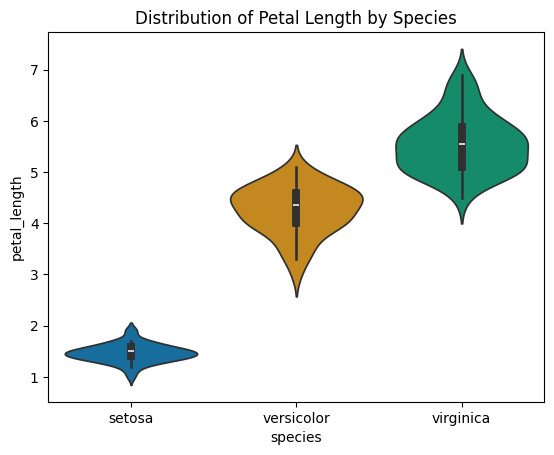

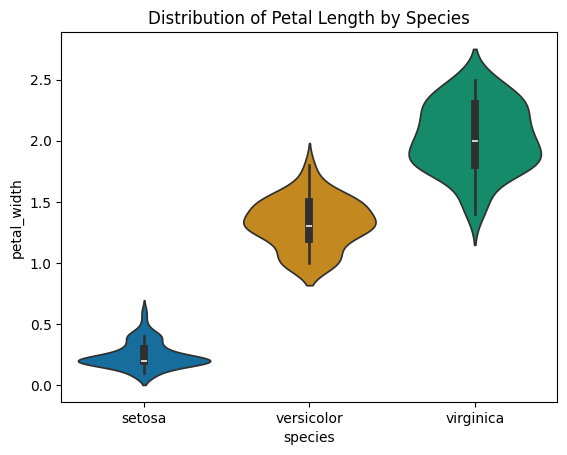

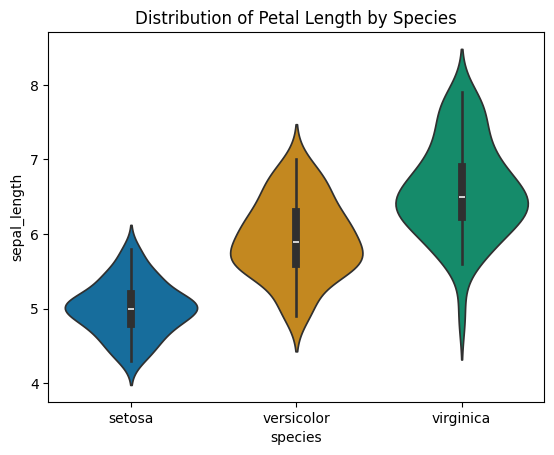

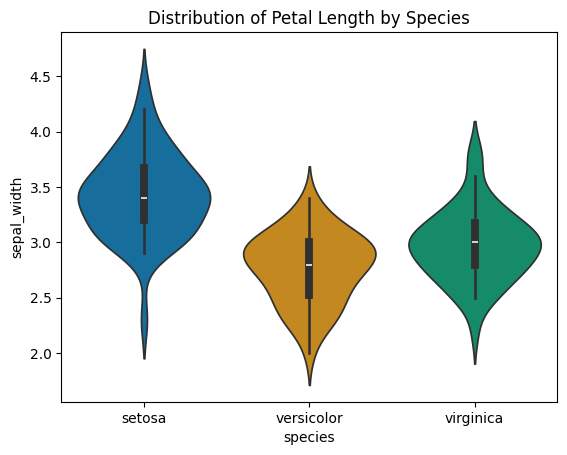

In [390]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset("iris")

# Create a violin plot to show the distribution of petal length by species.
# See: https://seaborn.pydata.org/tutorial/violinplots.html
sns.violinplot(data=iris, x="species", y="petal_length",hue="species", palette="colorblind")
plt.title("Distribution of Petal Length by Species")
plt.show()

# Create a violin plot to show the distribution of petal length by species.
# See: https://seaborn.pydata.org/tutorial/violinplots.html
sns.violinplot(data=iris, x="species", y="petal_width",hue="species", palette="colorblind")
plt.title("Distribution of Petal Length by Species")
plt.show()

# Create a violin plot to show the distribution of petal length by species.
# See: https://seaborn.pydata.org/tutorial/violinplots.html
sns.violinplot(data=iris, x="species", y="sepal_length", hue="species", palette="colorblind")
plt.title("Distribution of Petal Length by Species")
plt.show()

# Create a violin plot to show the distribution of petal length by species.
# See: https://seaborn.pydata.org/tutorial/violinplots.html
sns.violinplot(data=iris, x="species", y="sepal_width", hue="species", palette="colorblind")
plt.title("Distribution of Petal Length by Species")
plt.show()



## Analyis from Violin Plot 

Petal lengths differ dramatically across the three iris species, revealing that setosa has short petals with low variation, while virginica shows more spread.